In [1]:
import matplotlib 
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import json
import pandas
import pandas as pd
import csv
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\Users\Luke\Desktop\Fall_2018\505\merged_data\all_years_merged(logan,mouna,darpan).csv', encoding='cp1252', dtype='str', error_bad_lines=False)
df.shape

(85082, 12)

In [83]:
df.loc[67881]

eid                                                2-s2.0-84924613857
cite                                                                1
Lang                                                              eng
Para                Biogeography-based optimisation (BBO) algorith...
Title               Biogeography-based optimisation for flexible m...
year                                                              NaN
publication_name         International Journal of Production Research
publication_type                                              Journal
Author Keyword      ['biogeography-based optimisation algorithm', ...
Abbreviation                                                     BIOC
Code                                                             1311
Text                                                         Genetics
Name: 67881, dtype: object

In [82]:
df.fillna(0)

,eid,cite,Lang,Para,Title,year,publication_name,publication_type,Author Keyword,Abbreviation,Code,Text
0,2-s2.0-38049161948,2,eng,Prion proteins (PrPs) are infectious pathogens...,Comparative bioinformatics analysis of prion p...,2007,Experimental and Molecular Medicine,Journal,"['Computational biology', 'Neurodegenerative d...",BIOC,1303,Biochemistry
1,2-s2.0-36749042030,17,eng,"CCAP, the largest European protistan culture c...",The Culture Collection of Algae and Protozoa (...,2007,Gene,Journal,"['Biodiversity', 'Biological resource centre',...",BIOC,1311,Genetics
2,2-s2.0-84858487958,0,eng,It is increasingly difficult for teaching to k...,Developing a multidisciplinary online cyberinf...,2007,"ASEE Annual Conference and Exposition, Confere...",Conference Proceeding,0,BIOC,1311,Genetics
3,2-s2.0-84858511527,0,eng,This paper provides an overview of design and ...,Integration of bioinformatics in science curri...,2007,"ASEE Annual Conference and Exposition, Confere...",Conference Proceeding,0,ENGI,2200,Engineering (all)
4,2-s2.0-84858503835,0,eng,Rapid advances in scientific engineering and c...,A project-centric approach for cyberinfrastruc...,2007,"ASEE Annual Conference and Exposition, Confere...",Conference Proceeding,0,ENGI,2200,Engineering (all)
5,2-s2.0-37349108551,3,eng,"In DNA microarray experiments, the gene fragme...",Optimal clone identifier for genomic shotgun l...,2007,Genetics and Molecular Research,Journal,"['Bioinformatics tool', 'Comparative genomic h...",ENGI,2200,Engineering (all)
6,2-s2.0-37349041400,7,eng,The rate at which knowledge about genomic sequ...,Ab initio 3-D structure prediction of an artif...,2007,Genetics and Molecular Research,Journal,"['Ab initio prediction', 'Molecular dynamics s...",BIOC,1311,Genetics
7,2-s2.0-37349014523,3,eng,Flagella are constructed and maintained throug...,Intraflagellar transport complex in Leishmania...,2007,Genetics and Molecular Research,Journal,"['Bioinformatics', 'Flagellar motility', 'Geno...",BIOC,1311,Genetics
8,2-s2.0-84858512072,0,eng,Tremendous advances are being made in pharmace...,Collaborative efforts facilitate the growth of...,2007,"ASEE Annual Conference and Exposition, Confere...",Conference Proceeding,0,BIOC,1311,Genetics
9,2-s2.0-37349065612,6,eng,This paper describes a Ventricular Tachycardia...,Ventricular tachycardia/fibrillation detection...,2007,Lecture Notes in Computer Science (including s...,Book Series,"['ECG signal processing', 'Heart monitoring', ...",ENGI,2200,Engineering (all)


In [84]:
years = df['year'].astype(str).astype(float)

In [87]:
nas = years.isna()
for x in range(0,len(nas)):
    if nas.loc[x]:
        print(x,nas[x])
        years[x] = 0

0.0

In [92]:
for x in range(0,len(nas)):
    if nas.loc[x]:
        print(x,nas[x])

In [97]:
years = years.astype(int)

0    2007
1    2007
2    2007
3    2007
4    2007
Name: year, dtype: int32

In [68]:
cites = df['cite'].astype(str).astype(int)
cites.describe()
# standard deviation: 132.255861
# 3x standard deviation: 396.767583

count    85082.000000
mean        15.586846
std        132.255861
min          0.000000
25%          0.000000
50%          2.000000
75%         10.000000
max      23672.000000
Name: cite, dtype: float64

In [99]:
cite_years = pd.concat([cites, years], axis=1)
cite_years.describe()

,cite,year
count,85082.000000,85082.000000
mean,15.586846,2010.296890
std,132.255861,21.056996
min,0.000000,0.000000
25%,0.000000,2008.000000
50%,2.000000,2011.000000
75%,10.000000,2014.000000
max,23672.000000,2017.000000


In [106]:
cite_years = cite_years[cite_years['cite'] < 397]

In [118]:
cite_years.head()

,cite,year
0,2,2007
1,17,2007
2,0,2007
3,0,2007
4,0,2007


In [ ]:
langs = df['Lang'].astype(str)
langs.describe()

In [18]:
cite_lang = pd.concat([cites, langs], axis=1)

In [19]:
cite_lang.head()

,cite,Lang
0,2,eng
1,17,eng
2,0,eng
3,0,eng
4,0,eng


In [20]:
cites = cite_lang.cite

In [21]:
cite_counts = cite_lang['cite'].value_counts()

In [22]:
cite_counts.head()

0    33192
1     8773
2     5178
3     3863
4     3044
Name: cite, dtype: int64

In [23]:
citations = cite_lang[cite_lang['cite'] < 397]

In [24]:
type(citations)

pandas.core.frame.DataFrame

In [25]:
citations.describe()

,cite
count,84781.000000
mean,11.712612
std,30.047078
min,0.000000
25%,0.000000
50%,2.000000
75%,10.000000
max,396.000000


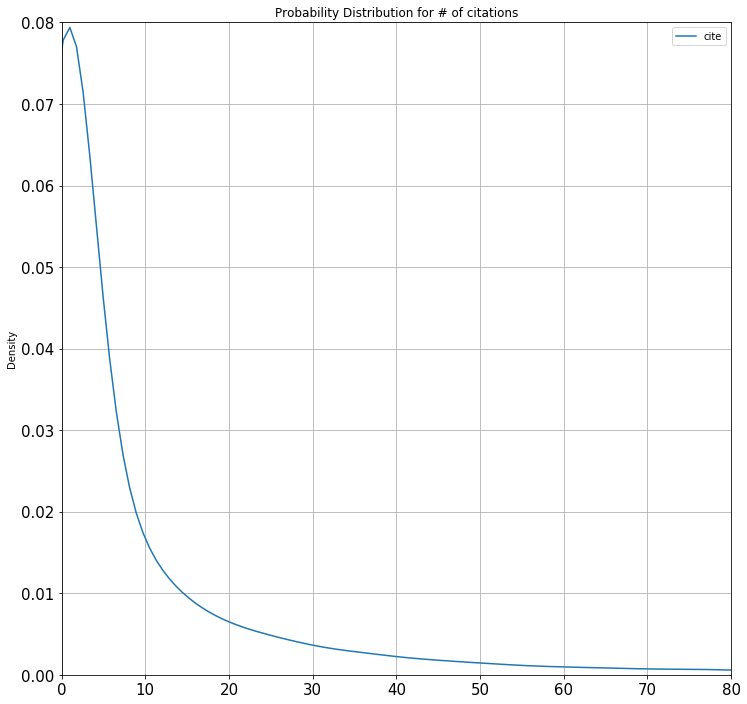

In [27]:
pd.DataFrame(citations).plot(kind="density",  # Plot the distribution
                               figsize=(12,12),
                               fontsize=15.0,
                               xlim=(0,80),
                               ylim=(0,.08),
                               legend=True,
                               grid=True,
                               title="Probability Distribution for # of citations")

In [120]:
cite_years = cite_years[cite_years.year != 0]
cite_years.describe()

,cite,year
count,84772.000000,84772.000000
mean,11.713526,2010.524312
std,30.048524,3.976626
min,0.000000,1986.000000
25%,0.000000,2008.000000
50%,2.000000,2011.000000
75%,10.000000,2014.000000
max,396.000000,2017.000000


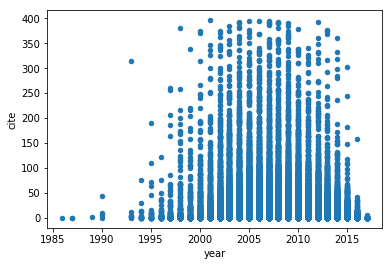

In [121]:
cite_years.plot(kind='scatter', x='year', y='cite')

In [ ]:
cite_counts = pd.DataFrame({'cites':cite_counts.index, 'counts':cite_counts.values})
print(cite_counts.head())
print(len(cite_counts))

In [ ]:
plt.scatter(df.preTestScore, df.postTestScore

In [ ]:
c_l.boxplot(by='Lang', 
                       column=['cite'], 
                       grid=False)

In [ ]:
bplot = sns.boxplot(y='cite', x='Lang', 
                 data=c_l, 
                 width=0.5,)

In [ ]:
c_l = c_l[c_l.cite.str.contains("nan") == False]

In [ ]:
cites

In [ ]:
c_l['cite'].describe()

In [ ]:
c_l.cite.describe()